# **Simple Linear Regression**
<hr>

**Tujuan Instruksional Umum:**
1. Peserta mampu membuat program untuk memberikan prediksi berdasarkan data numerikal (continuous).
2. Peserta mampu mengevaluasi model machine learning berdasarkan evaluation metrics

**Target Pertemuan**: 
1. Peserta mampu membuat prediksi data numerik menggunakan Simple Linear Regression.
2. Peserta mampu mengevaluasi model prediksi regresi menggunakan evaluation metric seperti MSE, RMSE, MAE, Med AE, dan R2 Score.

<hr>

Simple linear regression is an approach for predicting a response using a single feature.

It is assumed that the two variables are linearly related. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

Linear relationship basically means that when one (or more) independent variables increases (or decreases), the dependent variable increases (or decreases) too:

<img src='f_img.png'>

As you can see, a linear relationship can be positive (independent variable goes up, dependent variable goes up) or negative (independent variable goes up, dependent variable goes down).

**Applications:**

1. **Trend lines**: A trend line represents the variation in some quantitative data with passage of time (like GDP, oil prices, etc.). These trends usually follow a linear relationship. Hence, linear regression can be applied to predict future values. However, this method suffers from a lack of scientific validity in cases where other potential changes can affect the data.

2. **Economics**: Linear regression is the predominant empirical tool in economics. For example, it is used to predict consumption spending, fixed investment spending, inventory investment, purchases of a country’s exports, spending on imports, the demand to hold liquid assets, labor demand, and labor supply.

3. **Finance**: Capital price asset model uses linear regression to analyze and quantify the systematic risks of an investment.

4. **Biology**: Linear regression is used to model causal relationships between parameters in biological systems.

## **Linear Regression Theory**
The term “linearity” in algebra refers to a ``linear relationship`` between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a ``linear relationship between x (input) and y (output)``. Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

We know that the equation of a straight line is basically:

<img src='a_img.png' width=550 height=550>

The equation of the above line is :

## **``Y = mx + c``**

Where:
### **c is the ``intercept``**
### **m is the ``slope``** of the line. 

So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept (b) and slope (m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

<img src= 'b_img.gif'>

<hr>

## __``Melbourne House Dataset``__

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtit

In [6]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.533505,0.283885,0.051237,0.951793,0.613853,0.422526,0.098755,0.608215,-0.068122,0.016049,0.088031,-0.111422
Price,0.533505,1.000000,-0.148867,0.125539,0.514561,0.503922,0.261507,0.081419,0.530574,-0.304633,-0.213574,0.211760,-0.046410
Distance,0.283885,-0.148867,1.000000,0.405729,0.290242,0.124530,0.273615,0.059369,0.159603,0.246291,-0.094494,0.221861,-0.083969
Postcode,0.051237,0.125539,0.405729,1.000000,0.053770,0.109804,0.043713,0.025807,0.078483,0.024375,-0.425172,0.471305,0.064534
Bedroom2,0.951793,0.514561,0.290242,0.053770,1.000000,0.617751,0.425726,0.097172,0.593000,-0.056343,0.021309,0.085895,-0.109401
Bathroom,0.613853,0.503922,0.124530,0.109804,0.617751,1.000000,0.340808,0.076295,0.534425,0.157820,-0.072020,0.116103,-0.067126
Car,0.422526,0.261507,0.273615,0.043713,0.425726,0.340808,1.000000,0.117647,0.334282,0.108714,0.011973,0.054699,-0.046487
Landsize,0.098755,0.081419,0.059369,0.025807,0.097172,0.076295,0.117647,1.000000,0.084825,0.026518,0.005610,0.032918,-0.017784
BuildingArea,0.608215,0.530574,0.159603,0.078483,0.593000,0.534425,0.334282,0.084825,1.000000,0.005836,-0.037904,0.103613,-0.066144
YearBuilt,-0.068122,-0.304633,0.246291,0.024375,-0.056343,0.157820,0.108714,0.026518,0.005836,1.000000,0.057108,-0.002114,-0.000797


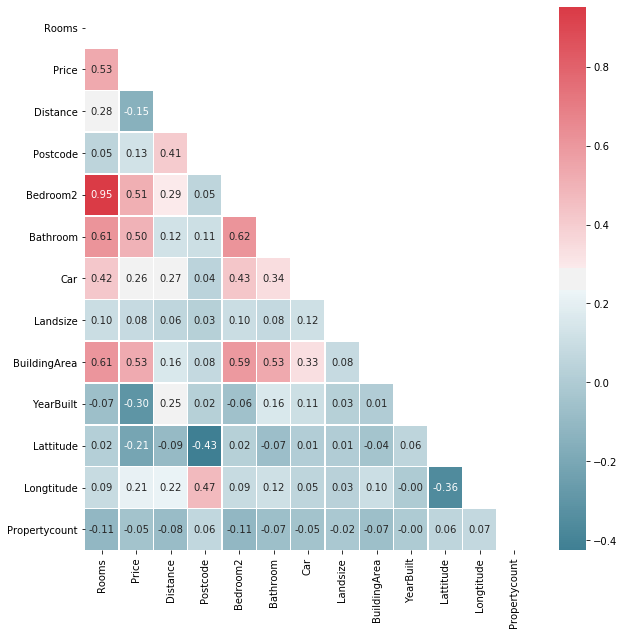

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

### **Memisahkan feature/variabel independen (x) dengan target/variabel dependen (y)**

In [14]:
X = df['BuildingArea'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

### __Visualisasi hubungan feature/variabel independen (x) dengan target/variabel dependen (y)__

Text(0.5, 1.0, 'Hubungan BuildingArea dan Price')

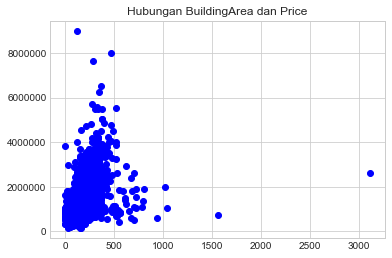

In [16]:
plt.style.use('seaborn-whitegrid')
plt.plot(X, y, 'o', color='blue')
plt.title('Hubungan BuildingArea dan Price')

### __Memisahkan Data (_Splitting_) menjadi Data Train dan Data Test__

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### __Training Model dengan Data Train__

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training algoritma Simple Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### __Mencari Nilai Slope & Intercept__

In [25]:
# Nilai Slope
print(regressor.coef_)

# Nilai intercept
print(regressor.intercept_)

[[4465.00904144]]
[430332.09796865]


## **``Y = mx + c``**

- Y = variabel dependen / target / yang diprediksi
- X = variabel independen / feature / yang memprediksi
- m = slope
- c = intercept/constanta

## **``HargaRumah = (4465 x BuildingArea) + 430332 ``**

In [26]:
# Tebak harga rumah
luas_rumah = int(input('Berapa luas rumahmu: '))

print('Harga rumahmu: US$', (4465 * luas_rumah) + 430332)

Berapa luas rumahmu:  400


Harga rumahmu: US$ 2216332


### __Membuat kolom y Predict (prediksi harga rumah)__

In [29]:
y_pred = regressor.predict(X_test)

In [31]:
df1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1

,Actual,Predicted
0,815000.0,7.473477e+05
1,655000.0,7.428827e+05
2,957500.0,6.893026e+05
3,1330000.0,1.251894e+06
4,722000.0,8.232529e+05
...,...,...
1235,1460000.0,9.616682e+05
1236,900000.0,1.140269e+06
1237,1250000.0,1.216174e+06
1238,627500.0,8.098579e+05


### __Visualisasi Perbandingan y_Actual dengan y_Predict__

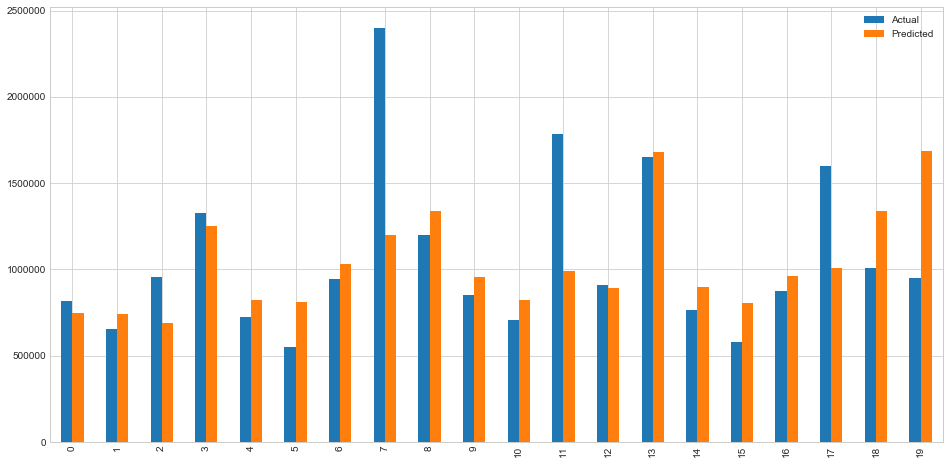

In [32]:
df2 = df1.head(20)
df2.plot(kind='bar', figsize=(16, 8))
plt.show()

In [ ]:
TEBAK : 1.000.000.000
ERROR :     5.000.000 --- harga rumah?
ERROR :     5.000.000 --- harga smartphone?
    
ACTUAL: 955 juta - 1.005 miliar

output error harus dimaknai dengan domain knowledge

### __R-Squared__

A metric you can use to quantify how much dependent variable variation your linear model explains is called R-Squared (R2). In other words, it evaluates how closely y values scatter around your regression line, the closer they are to your regression line the better.

The range of R-Squared goes from 0% to 100%. The higher the R-Squared the better.

In [33]:
regressor.score(X, y)

0.2764987751461836

## __Interpreting Regression Coefficients__

Be careful though, you can’t just use R-Squared to determine how good your model is. For example, your coefficients could be biased and you wouldn’t know by looking at R-Squared. And, if you have multiple independent variables it doesn’t tell you anything about them. 

This is an important step when performing a regression analysis. At the end of the day, the coefficients and intercepts are the values you are looking for in order to quantify the relationship. How do you know if the independent variable is truly predictive or not?

To interpret the regression coefficients you must perform a hypothesis test of the coefficients. In a regression analysis, it goes as follows:

-    __Null Hypothesis (H0)__: The coefficients are zero
-    __Alternate Hypothesis (H1)__: The coefficients are NOT zero

In other words, if the coefficients are truly zero, it means that the independent variable has no predictive power and should be tossed away. This hypothesis test is performed on all coefficients.

To test the coefficient’s null hypothesis we will be using the t statistic. Look at the **P>| t | column**. These are the **p-values** for the **t-test**. In short, if they are less than the desired significance (**commonly .05**), **you reject the null hypothesis**. Otherwise, you fail to reject the null and therefore should toss out that independent variable.

Above, assuming a significance value of 0.05, our P-Value of 0.000 is much lower than a significance. Therefore, we reject the null hypothesis that the coefficient is equal to 0 and conclude that x1 is an important independent variable to utilize.

If you had more independent variables they would be listed here and you would perform a similar test.

In [34]:
import statsmodels.api as sm

In [37]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.748
Method:                 Least Squares   F-statistic:                          1.834e+04
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                        0.00
Time:                        11:09:58   Log-Likelihood:                         -91581.
No. Observations:                6196   AIC:                                  1.832e+05
Df Residuals:                    6195   BIC:                                  1.832e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<hr>

# **Evaluation Metrics**

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

### 1.    Mean Absolute Error (MAE)
MAE is the mean of the absolute value of the errors. It is calculated as:

<img src='c_img.png'>

### 2. Mean Squared Error (MSE) 
MSE is the mean of the squared errors and is calculated as:

<img src='d_img.png'>

### 3. Root Mean Squared Error (RMSE) 
RMSE is the square root of the mean of the squared errors:

<img src='e_img.gif'>

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

In [42]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Max Error: ', metrics.max_error(y_test, y_pred))

Mean Absolute Error (MAE):  391034.76766252646
Mean Squared Error (MSE):  485969318728.79486
Root Mean Squared Error (RMSE):  697114.9967751339
Max Error:  11717440.234934734


In [57]:
mean_price = df['Price'].mean()
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mae = metrics.mean_absolute_error(y_test, y_pred)
maks = metrics.max_error(y_test, y_pred)

print(round(rmse / mean_price * 100, 2), '%')
print(round(mae / mean_price * 100, 2), '%')
print(round(maks / mean_price * 100, 2), '%')

65.22 %
36.59 %
1096.29 %


In [46]:
print('Med AE: ', 
      round(metrics.median_absolute_error(y_test, y_pred), 2))
print('MSLE: ', 
      round(metrics.mean_squared_log_error(y_test, y_pred), 2))
print('RMSLE: ', 
      np.sqrt(metrics.mean_squared_log_error(y_test, y_pred)))
print('R2 Score: ', 
      round(metrics.r2_score(y_test, y_pred), 2))

Med AE:  268389.96
MSLE:  0.2
RMSLE:  0.44685374788788235
R2 Score:  0.11


In [47]:
# MAE
(2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2 + 2)/10

2.0

In [48]:
# RMSE
np.sqrt(((2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2) + (2**2))/10)

2.0

In [49]:
# MAE
(2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11)/10

6.5

In [50]:
# RMSE
np.sqrt(((2**2) + (3**2) + (4**2) + (5**2) + (6**2) + (7**2) + (8**2) + (9**2) + (10**2) + (11**2))/10)

7.106335201775948

<hr>

# __Take Home Exercise__
1. Dataset yang digunakan adalah melb_data.csv. X = Distance, Y = Price

2. Buat beberapa percobaan untuk menemukan model SLR terbaik:

3. ``Urutan percobaan 1 (train 80% test 20%)``:
    
    3.a) Distance = filling missing value
    
    3.b) Distance = langkah (a) + drop outlier
    
    3.c) Distance = langkah (a) + scalling
    
4. ``Urutan percobaan 2 (train 90% test 10%)``:
    
    4.a) Distance = filling missing value
    
    4.b) Distance = langkah (a) + drop outlier
    
    4.c) Distance = langkah (a) + scalling    
    
5. Di setiap percobaan tampilkan ``MAE, MSE, dan RMSE``

6. Simpulkan percobaan mana yang memberikan error yang paling rendah?

7. Kirim jawaban ke email saya: nurrokim@purwadhika.com

## **Reference**
* Nagesh Singh Chauhan, "A beginner’s guide to Linear Regression in Python with Scikit-Learn", https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
* Dataset source: https://www.kaggle.com/usaf/world-war-ii
* Adi Bronshtein, "Simple and Multiple Linear Regression in Python", https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
* GeeksforGeeks, "Linear Regression (Python Implementation)", https://www.geeksforgeeks.org/linear-regression-python-implementation/
* InsightsBot, "Python Linear Regression Analysis", https://www.insightsbot.com/python-linear-regression-analysis/
* InsightBot, "Assumptions of Linear Regression with Python", https://www.insightsbot.com/assumptions-of-linear-regression-with-python/